In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

##### There are multple files that contain the overarching data as heuristics of the bouts under analyis.

In [3]:
exercise_overview_path = '/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/GalaxyWatchData/com.samsung.health.exercise.2024110708.csv'

exercise_overview = pd.read_csv(exercise_overview_path, index_col=False)

hr_overview_path = '/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/GalaxyWatchData/com.samsung.health.heart_rate.2024110708.csv'

hr_overview = pd.read_csv(hr_overview_path, index_col=False)

step_count_path = '/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/GalaxyWatchData/com.samsung.health.step_count.2024110708.csv'

step_count = pd.read_csv(step_count_path, index_col=False)

### Bouts of heart rate measurement

In [4]:
# Convert Start time to datetime
hr_overview['start_time'] = pd.to_datetime(hr_overview['start_time'], format='%m/%d/%Y, %I:%M:%S %p')
hr_overview['end_time'] = pd.to_datetime(hr_overview['end_time'], format='%m/%d/%Y, %I:%M:%S %p')
# Make a new column and place the date 
hr_overview['date'] = hr_overview['start_time'].dt.date

In [5]:
hr_df = hr_overview[['datauuid','create_time','start_time', 'end_time', 'date', 'heart_rate', 'min','max']].copy()

In [6]:
hr_df = hr_df.sort_values(by='create_time')

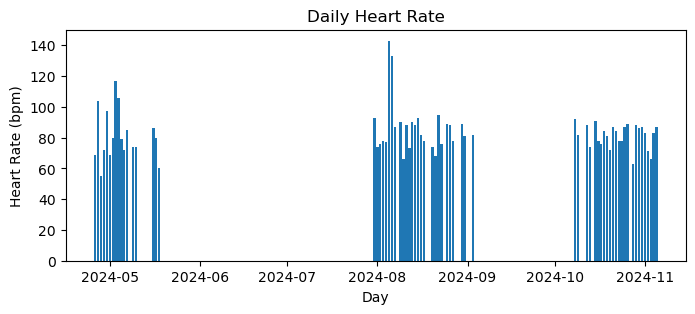

In [7]:
# Initialize Variables
date_x = hr_df['date']
hr = hr_df['heart_rate']

# Create the figure
plt.figure(figsize=(8, 3))
# Plot the variables
plt.bar(date_x, hr)
plt.title('Daily Heart Rate')
plt.xlabel('Day')
plt.ylabel('Heart Rate (bpm)')
plt.show()

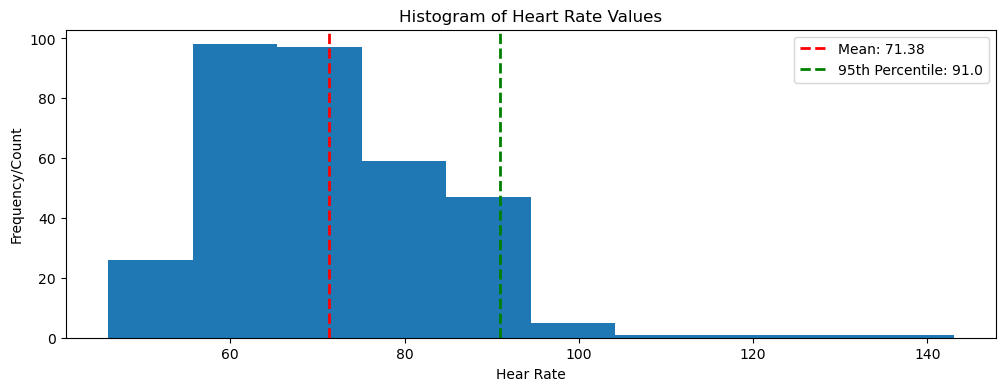

In [8]:
# Find the 95th percentile
percentile_95 = np.percentile(hr, 95)

# Create the figure
plt.figure(figsize=(12,4))
plt.hist(hr, bins=10)
plt.axvline(x=hr.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {hr.mean():.2f}')
plt.axvline(x=percentile_95, color='green', linestyle='dashed', linewidth=2, label=f'95th Percentile: {percentile_95}')
plt.title('Histogram of Heart Rate Values')
plt.xlabel('Hear Rate')
plt.ylabel('Frequency/Count')
plt.legend()
plt.show()

### Exercise Analysis

In [9]:
exercise_df = exercise_overview[['datauuid', 'start_time', 'end_time', 'duration', 'mean_heart_rate', 'min_heart_rate', 'max_heart_rate', 'calorie', 'mean_speed', 'max_speed', 'exercise_type']].copy()

In [10]:
exercise_df['start_time'] = pd.to_datetime(exercise_df['start_time'], format='%m/%d/%Y, %I:%M:%S %p')
exercise_df['end_time'] = pd.to_datetime(exercise_df['end_time'], format='%m/%d/%Y, %I:%M:%S %p')

exercise_df['date'] = exercise_df['start_time'].dt.date

# Generate a new duration as the currnet is an int of miliseconds
exercise_df['new_duration'] = (exercise_df['end_time'] - exercise_df['start_time']).dt.total_seconds() / 60

exercise_df = exercise_df.sort_values(by='start_time')

In [11]:
exercise_df

,datauuid,start_time,end_time,duration,mean_heart_rate,min_heart_rate,max_heart_rate,calorie,mean_speed,max_speed,exercise_type,date,new_duration
0,04ddf549-cbc9-351f-9b1a-51511470d787,2024-04-26 13:54:25,2024-04-26 14:09:18,892524,93.0,87.0,106.0,74.0,1.465623,2.277778,1001,2024-04-26,14.883333
1,b3ccd525-0f82-7fba-26d7-adf73ca28653,2024-04-26 16:55:57,2024-04-26 17:23:55,1678069,101.0,76.0,123.0,129.0,1.321615,1.632821,1001,2024-04-26,27.966667
2,bc0b0c14-f135-35f7-2601-4f09f3245ede,2024-04-26 17:46:52,2024-04-26 18:09:34,1362498,103.0,75.0,130.0,104.0,1.282309,1.558825,1001,2024-04-26,22.700000
3,3d5f56af-cbe4-a971-1693-0e60ab8d17d7,2024-04-27 05:02:32,2024-04-27 06:33:30,5457954,134.0,86.0,161.0,940.0,2.399807,2.655528,1002,2024-04-27,90.966667
4,ac3f23d2-1cac-a929-49a6-53d1ea9aeb02,2024-04-27 13:43:41,2024-04-27 13:56:00,739164,95.0,72.0,113.0,57.0,1.411960,1.745525,1001,2024-04-27,12.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,a5875b2a-e5d0-ea71-7ca3-dc46742d5989,2024-11-02 12:07:37,2024-11-02 12:21:42,845078,104.0,95.0,117.0,69.0,1.417730,1.583333,1001,2024-11-02,14.083333
84,bfa737cb-b1d2-b903-ea06-4753990ebf2e,2024-11-03 10:39:15,2024-11-03 11:21:15,2519495,113.0,101.0,131.0,213.0,1.416415,1.570658,1001,2024-11-03,42.000000
85,ac9cf0d3-ba7c-5314-3233-e9f9bea233c1,2024-11-04 09:57:56,2024-11-04 10:40:35,2558345,83.0,57.0,102.0,213.0,1.426104,1.603064,1001,2024-11-04,42.650000
86,bef04fbd-1e76-7d72-f837-f286e792d2b2,2024-11-06 12:31:28,2024-11-06 13:03:57,1949329,97.0,77.0,149.0,167.0,1.417528,2.451668,1001,2024-11-06,32.483333


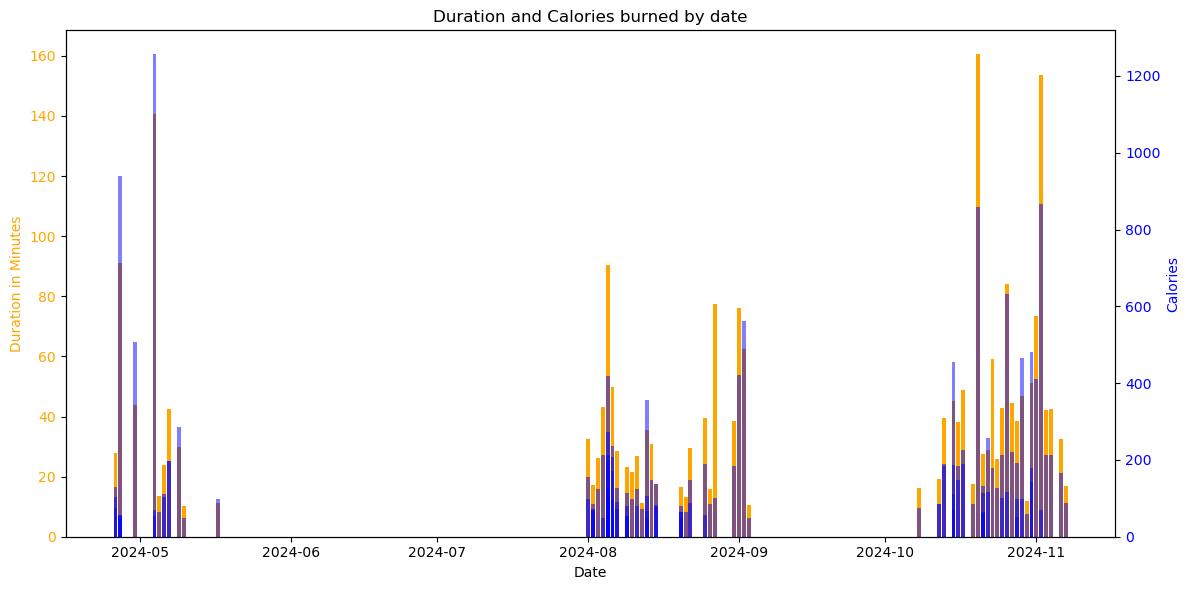

In [12]:
# Initilize Variables
x2 = exercise_df['date']
y2 = exercise_df['new_duration']
x2_calories = exercise_df['calorie']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first bar (Duration in Minutes)
ax1.bar(x2, y2, color='orange', label='Duration in Minutes')
ax1.set_xlabel('Date')
ax1.set_ylabel('Duration in Minutes', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create a second y-axis for the Calories bar
ax2 = ax1.twinx()
ax2.bar(x2, x2_calories, color='blue', label='Calories', alpha=0.5)
ax2.set_ylabel('Calories', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
plt.title('Duration and Calories burned by date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### A big issue here is that all these bouts of exercise include hikes, runs, and walks. All are very frequent. Will have to use external data from MapMyRun, AllTrails, and Polar to differentiate. Walks will be the toughest to categorize.

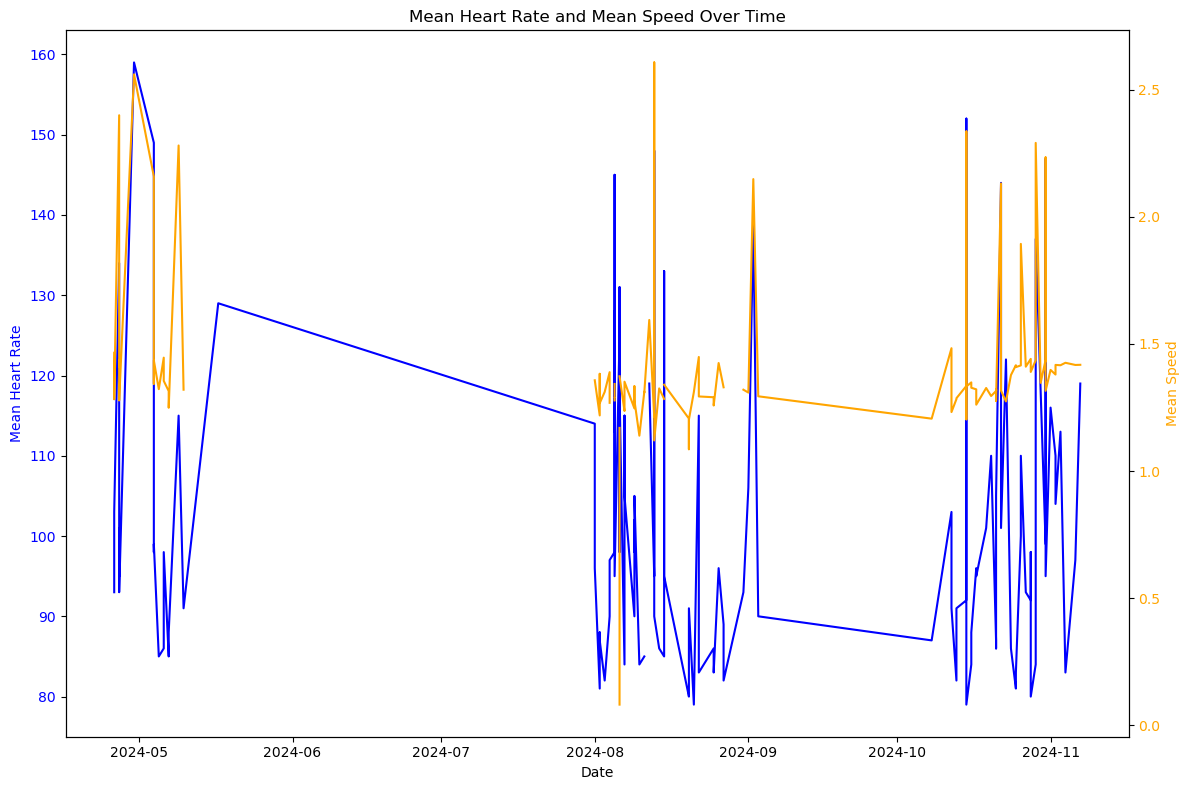

In [13]:
# Initialize Variables
x2_hr = exercise_df['mean_heart_rate']
x2_speed = exercise_df['mean_speed']

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the mean heart rate on the first axes
ax1.plot(x2, x2_hr, color='blue', label='Mean Heart Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Heart Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second axes that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(x2, x2_speed, color='orange', label='Mean Speed')
ax2.set_ylabel('Mean Speed', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.title('Mean Heart Rate and Mean Speed Over Time')
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

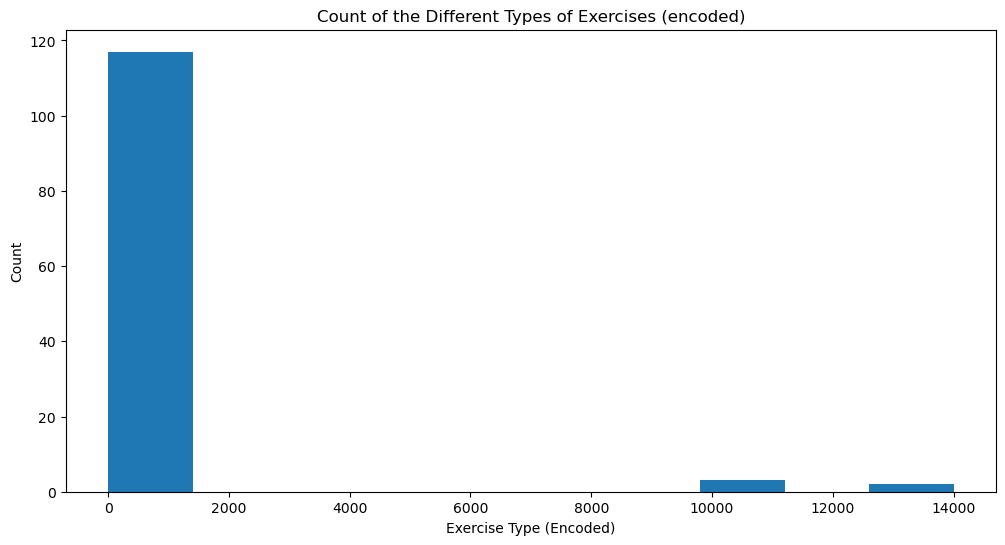

In [14]:
# Histogram of the Exercise type
plt.figure(figsize=(12,6))
plt.hist(exercise_df['exercise_type'])
plt.title('Count of the Different Types of Exercises (encoded)')
plt.xlabel('Exercise Type (Encoded)')
plt.ylabel('Count')
plt.show()

#### Need to find the mapping of Exercise Type or can differentiate through further analysis of the groups. Can also do some statistical analyis on the different groups

In [15]:
walks = exercise_df[exercise_df['exercise_type'] == 1001]

uuid = '04ddf549-cbc9-351f-9b1a-51511470d787'
df_walk = pd.read_json(f"/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/GalaxyWatchData/jsons/com.samsung.health.exercise/{uuid}.live_data.json")

unique_uuids = walks['datauuid'].unique()

all_walk_data = []

for uuid in unique_uuids:
    try:
        # Define the file path
        file_path = f"/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/GalaxyWatchData/jsons/com.samsung.health.exercise/{uuid}.live_data.json"
        
        # Check if the file exists
        if not os.path.exists(file_path):
            print(f"File not found for UUID: {uuid}")
            continue
        
        # Load JSON file
        df = pd.read_json(file_path)
        
        # Add UUID column for tracking
        df['datauuid'] = uuid
        
        # Append to the list
        all_walk_data.append(df)
    
    except ValueError as ve:
        # Handle invalid JSON
        print(f"Error reading JSON for UUID {uuid}: {ve}")
    except Exception as e:
        # Catch-all for unexpected errors
        print(f"Unexpected error for UUID {uuid}: {e}")

In [16]:
# Combine all valid DataFrames
if all_walk_data:
    all_walk_data_df = pd.concat(all_walk_data, ignore_index=True)
    print("Data successfully combined!")
else:
    print("No valid data was loaded.")

Data successfully combined!


In [17]:
# Ensure the DataFrame is not empty
if not all_walk_data_df.empty:
    # Convert 'start_time' to datetime if not already done
    all_walk_data_df['start_time'] = pd.to_datetime(all_walk_data_df['start_time'], unit='ms')
    
    # Create a new column for duration in seconds since the start of each group
    all_walk_data_df['duration_seconds'] = (
        all_walk_data_df
        .groupby('datauuid')['start_time']
        .transform(lambda x: (x - x.min()).dt.total_seconds())
    )

    print("New column 'duration_seconds' created successfully!")
else:
    print("The DataFrame is empty. No operation performed.")

New column 'duration_seconds' created successfully!


In [18]:
# Ensure the DataFrame is not empty
if not all_walk_data_df.empty:
    # Create a 'duration_minutes' column by converting seconds to minutes
    all_walk_data_df['duration_minutes'] = (all_walk_data_df['duration_seconds'] // 60).astype(int)

    # Group by 'duration_minutes' and aggregate metrics
    aggregated_df = (
        all_walk_data_df
        .groupby('duration_minutes')
        .agg({
            'speed': 'mean',        # Take the mean speed
            'heart_rate': 'mean'    # Take the mean heart rate
        })
        .reset_index()  # Reset index to make 'duration_minutes' a column
    )

    print("Data has been aggregated by minutes:")
else:
    print("The DataFrame is empty. No operation performed.")

Data has been aggregated by minutes:


In [19]:
all_walk_data_df['date'] = pd.to_datetime(all_walk_data_df['start_time'], unit='ms').dt.strftime('%Y-%m-%d')
all_walk_data_df

,start_time,speed,heart_rate,datauuid,distance,cadence,duration_seconds,duration_minutes,date
0,2024-04-26 20:54:25.725,1.338654,NaN,04ddf549-cbc9-351f-9b1a-51511470d787,NaN,NaN,0.000,0,2024-04-26
1,2024-04-26 20:55:25.724,1.145645,NaN,04ddf549-cbc9-351f-9b1a-51511470d787,NaN,NaN,59.999,0,2024-04-26
2,2024-04-26 20:56:25.724,1.345484,NaN,04ddf549-cbc9-351f-9b1a-51511470d787,NaN,NaN,119.999,1,2024-04-26
3,2024-04-26 20:57:25.662,NaN,87.0,04ddf549-cbc9-351f-9b1a-51511470d787,NaN,NaN,179.937,2,2024-04-26
4,2024-04-26 20:57:25.724,1.412211,NaN,04ddf549-cbc9-351f-9b1a-51511470d787,NaN,NaN,179.999,2,2024-04-26
...,...,...,...,...,...,...,...,...,...
18763,2024-11-07 16:27:50.663,NaN,119.0,0e5da72a-2435-8b22-4a88-f81e07676fce,NaN,NaN,988.134,16,2024-11-07
18764,2024-11-07 16:28:00.664,NaN,117.0,0e5da72a-2435-8b22-4a88-f81e07676fce,NaN,NaN,998.135,16,2024-11-07
18765,2024-11-07 16:28:10.666,NaN,122.0,0e5da72a-2435-8b22-4a88-f81e07676fce,NaN,NaN,1008.137,16,2024-11-07
18766,2024-11-07 16:28:20.667,NaN,122.0,0e5da72a-2435-8b22-4a88-f81e07676fce,NaN,NaN,1018.138,16,2024-11-07


### I need to cross reference to hikes to exclude and not ruin the data (too high of HR)

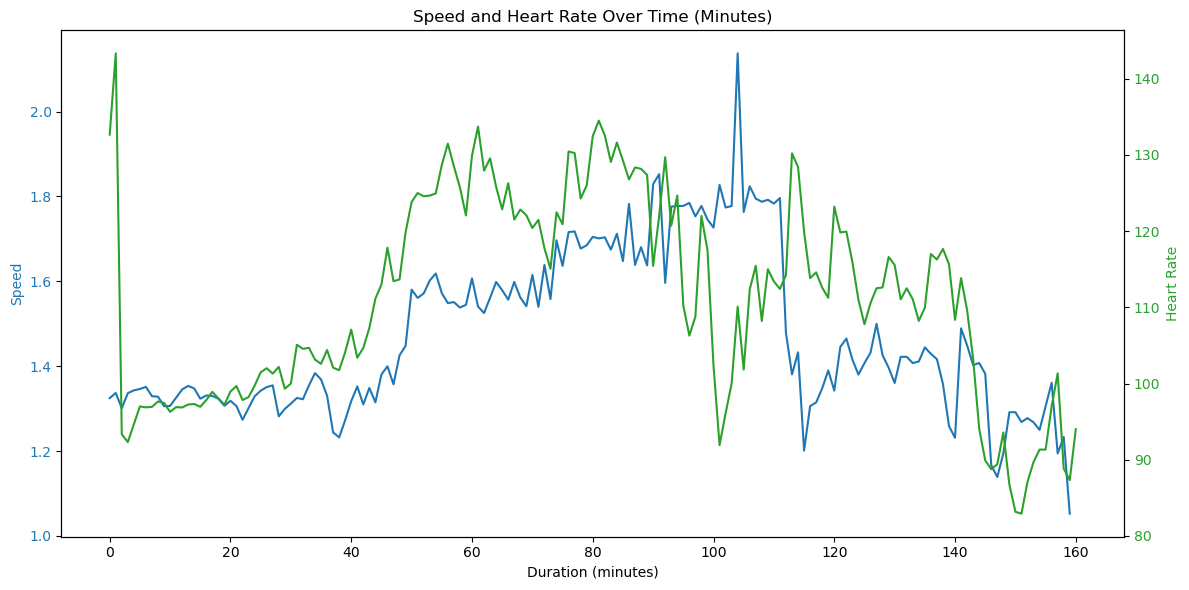

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'speed' on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Duration (minutes)')
ax1.set_ylabel('Speed', color=color)
ax1.plot(aggregated_df['duration_minutes'], aggregated_df['speed'], color=color, label='Speed')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'heart_rate'
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Heart Rate', color=color)
ax2.plot(aggregated_df['duration_minutes'], aggregated_df['heart_rate'], color=color, label='Heart Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Speed and Heart Rate Over Time (Minutes)')
fig.tight_layout()  # Ensure labels and titles don't overlap

# Show the plot
plt.show()

In [21]:
all_trails_df = pd.read_csv('/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/AllTrailsData/hikes_overview.csv')

In [58]:
testing = all_walk_data_df[all_walk_data_df['datauuid'] == '04ddf549-cbc9-351f-9b1a-51511470d787']
testing.shape

(88, 9)

In [22]:
all_trails_df

,Hike Name,Length,Elev_gain(ft),moving_time,Avg_pace,Calories,total_time,Date
0,Afternoon hike at Mission Peak via Peak Meadow...,5.82mi,2185,2:21:00,24.13,1223,2:28:40,12-1-2024
1,Afternoon hike at Stonewall Panoramic Loop,2.88mi,801,1:08:26,23.45,594,1:08:26,11-28-2024
2,Afternoon hike at Battery Construction 129 and...,0.21mi,95,0:05:11,24:28:00,45,0:5:11:00,11-24-2024
3,Afternoon hike at Rodeo Beach to Hill 88,4.16mi,1050,1:25:42,20:37,743,1:31:54,11-24-2024
4,fternoon hike at Montara Mountain North Peak Loop,7.27mi,1749,2:36:47,21:34,1360,2:43:52,11-2-2024
5,Evening hike at Palos Colorados Sequoia Bayvie...,3.21mi,827,1:09:51,21:46,606,1:09:51,11-1-2024
6,"Afternoon hike at Dunn, Stream, Graham Trail Loop",7.95mi,1506,2:40:57,20:15,1396,2:43:02,10-20-2024
7,Evening hike at Stonewall Panoramic Loop,2.87mi,794,1:05:18,22:43,566,1:05:18,9-22-2024
8,"Afternoon hike at Upper Big Springs, Lower Big...",3.74mi,833,1:14:04,19:49,642,1:15:02,9-1-2024
9,Afternoon hike at Bunting Trail,3.32mi,1240,1:24:26,25:24:00,732,1:38:16,8-8-2024


In [39]:
all_walk_data_df['date'] = pd.to_datetime(all_walk_data_df['date'])
all_trails_df['Date'] = pd.to_datetime(all_trails_df['Date'])

In [42]:
# Filter using isin
filtered_data = all_walk_data_df[all_walk_data_df['date'].isin(all_trails_df['Date'])]

In [49]:
filtered_data[filtered_data['date'] == '2024-11-02']['duration_minutes'].max()

153

In [ ]:

for date in all_trails_df['Date'].unique():
    df = all_walk_data_df[all_walk_data_df['date'] == date]

    if not df.empty:
        total_time = df['date'].max - df['date'].min()
        if 
            df['hike'] = 1
    else:
        df['hike'] = 0


### Step Count Analysis

In [24]:
step_count['start_time'] = pd.to_datetime(step_count['start_time'], format='%m/%d/%Y, %I:%M:%S %p')
step_count['end_time'] = pd.to_datetime(step_count['end_time'], format='%m/%d/%Y, %I:%M:%S %p')

step_count['date'] = step_count['start_time'].dt.date

step_count['new_duration'] = (step_count['end_time'] - step_count['start_time']).dt.total_seconds() / 60

step_count = step_count.sort_values(by='start_time')


In [25]:
step_count_df = step_count[['datauuid', 'start_time', 'end_time', 'date', 'new_duration', 'distance', 'calorie', 'count']].copy()

In [26]:
step_count_df

,datauuid,start_time,end_time,date,new_duration,distance,calorie,count
0,1fad79a3-6f94-1ad7-adbe-ad0000eb3b56,2024-04-26 10:03:00,2024-04-26 10:03:59,2024-04-26,0.983333,8.190000,0.300000,10
1,fdc6f334-9534-99af-f9bc-6a28e7d9f1a9,2024-04-26 10:06:00,2024-04-26 10:06:59,2024-04-26,0.983333,45.350000,2.080000,60
2,6a8bcfbd-fd51-acee-feff-774409fee3ce,2024-04-26 10:07:00,2024-04-26 10:07:59,2024-04-26,0.983333,14.260000,0.700000,19
3,ef845aac-ab33-f0d6-5a41-26ef4b505b76,2024-04-26 10:08:00,2024-04-26 10:08:59,2024-04-26,0.983333,13.370000,0.680000,19
4,3162d250-57e3-28c0-05b8-838d8ff09045,2024-04-26 10:11:00,2024-04-26 10:11:59,2024-04-26,0.983333,16.070000,0.730000,21
...,...,...,...,...,...,...,...,...
22607,e3b2c2d6-28a2-d08f-e9e0-b339dcbea643,2024-11-07 08:29:00,2024-11-07 08:29:59,2024-11-07,0.983333,11.300000,0.550000,15
22608,a31d1bc2-8fb3-f59d-a5b2-53c5d65341ce,2024-11-07 08:30:00,2024-11-07 08:30:59,2024-11-07,0.983333,56.370000,2.830000,75
22601,17309970-0000-0000-0000-309970000000,2024-11-07 08:30:00,2024-11-07 08:31:00,2024-11-07,1.000000,71.108528,3.292626,97
22609,4273fad8-c2e0-7f33-4b17-ea8d6d4b603e,2024-11-07 08:31:00,2024-11-07 08:31:59,2024-11-07,0.983333,6.920000,0.360000,10


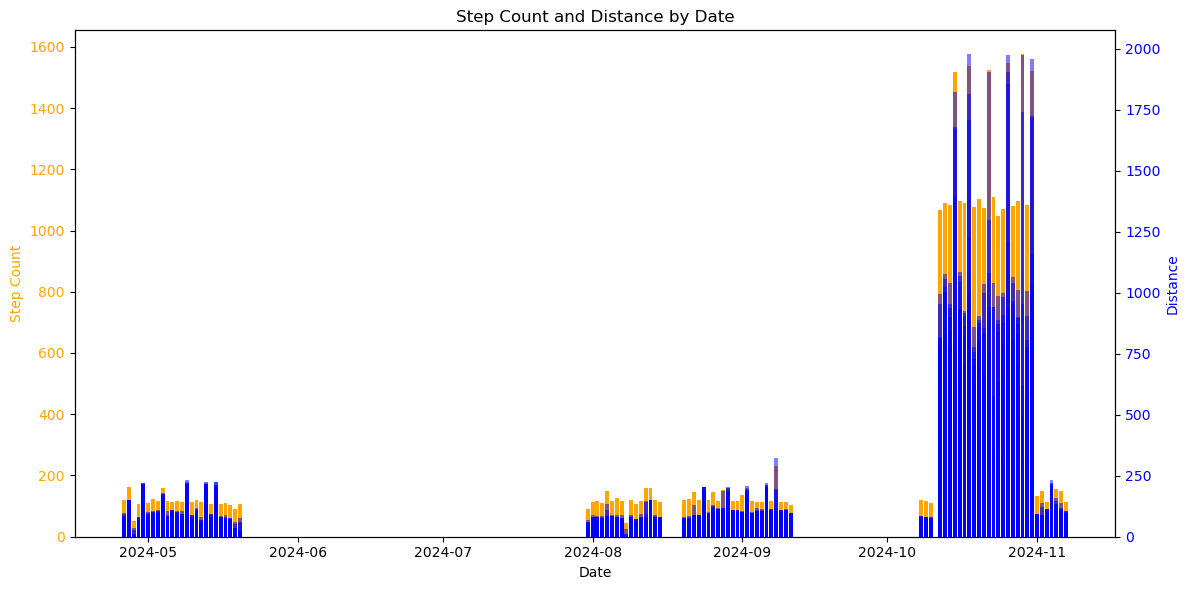

In [27]:
# Initialize Variables
x4 = step_count_df['date']
y4_count = step_count_df['count']
y4_distance = step_count_df['distance']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first bar (Step Count)
ax1.bar(x4, y4_count, color='orange', label='Step Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Step Count', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create a second y-axis for the Distance bar
ax2 = ax1.twinx()
ax2.bar(x4, y4_distance, color='blue', label='Distance', alpha=0.5)
ax2.set_ylabel('Distance', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Step Count and Distance by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


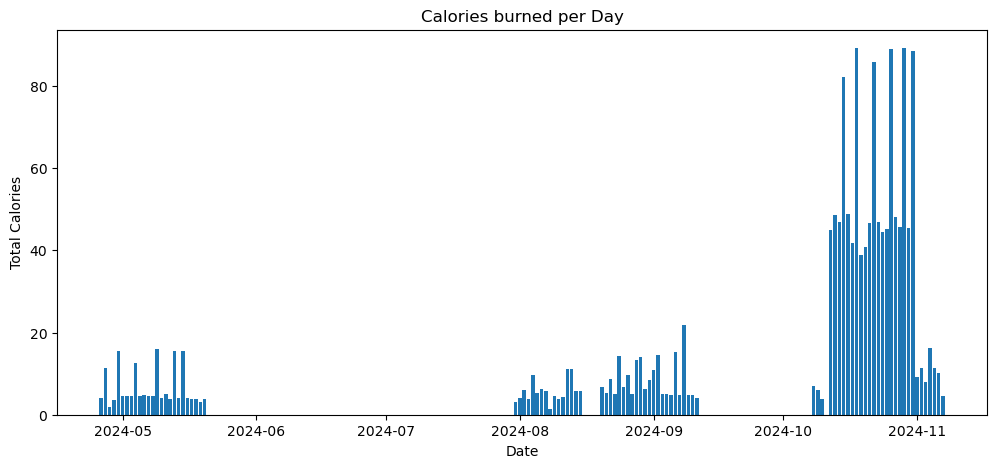

In [28]:
# Initialize Variable
y4_calorie = step_count_df['calorie']

# Create the Bar Graph
plt.figure(figsize=(12,5))
plt.bar(x4, y4_calorie)
plt.title("Calories burned per Day")
plt.xlabel('Date')
plt.ylabel('Total Calories')
plt.show()